# Book Recommendation Engine

## Collaborative Filtering Using k-Nearest Neighbors (kNN) with Cosine Similarity

### - Bassam Atheeque

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Reading three files namely books, ratings and users:

In [2]:
books = pd.read_csv('./Books.csv')
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [3]:
ratings = pd.read_csv('./Ratings.csv')
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [4]:
users = pd.read_csv('./Users.csv')
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [5]:
ratings['Book-Rating'].count()

1149780

#### Checking the distribution of the ratings to understand the presence of null values:

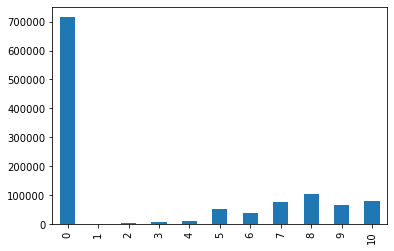

In [6]:
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.show()

#### As could be observed above, there are a lot of books that weren't rated but the data exists.
#### Let's ignore those observations and consider only those books that had rating from 1 to 10

In [7]:
# Choosing ratings that are greater than 0

ratings  = ratings[ratings['Book-Rating']!=0]

ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### Analyzing the total ratings for each book:

In [8]:
ratings_grouped = pd.DataFrame(ratings.groupby('ISBN')[['Book-Rating']].count())

ratings_grouped.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333


In [9]:
### Analyzing the average ratings for each book:

ratings_grouped['Avg Ratings'] = ratings.groupby('ISBN')[['Book-Rating']].mean()

ratings_grouped.rename(columns={"Book-Rating": "No. of Ratings"}, inplace = True)

ratings_grouped.sort_values('No. of Ratings', ascending=False)

,No. of Ratings,Avg Ratings
ISBN,,
0316666343,707,8.185290
0971880107,581,4.390706
0385504209,487,8.435318
0312195516,383,8.182768
0679781587,333,8.408408
...,...,...
0590407619,1,5.000000
0590407597,1,10.000000
0590407554,1,9.000000


#### As seen above, even though ISBN 0971880107	had a whopping 581 ratings, the average is very low at 4.39.
#### Hence, this book need not be recommended.
#### Note: Even though more users have rated the item, it doesn't always mean that it is worth recommending. We should do more analysis before we can recommend.

In [10]:
# Checking the data types:

books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

### Merging the tables to get a better understanding of the books and its ratings:

In [11]:
books_ratings = pd.merge(ratings_grouped, books, on='ISBN')

books_ratings.sort_values('Avg Ratings', ascending=False).head()

,ISBN,No. of Ratings,Avg Ratings,Book-Title,Book-Author,Year-Of-Publication,Publisher
15468,1567921701,1,10.0,Some Folk Think the South Pole's Hot: The Thre...,Elke Heidenreich,2001,David R. Godine Publisher
6061,067174108X,1,10.0,DANGEROUS GAMES (NANCY DREW HARDY BOY SUPERMYS...,Carolyn Keene,1991,Simon Pulse
18239,1578260574,1,10.0,Living with Juvenile Diabetes: A Practical Gui...,Victoria Peurrung,2001,Hatherleigh Press
18250,1578409861,1,10.0,"WWF Attitude, Get It: Official Acclaim Strateg...",Bill Banks,1999,Acclaim Entertainment
6056,067173735X,1,10.0,Trumped!: The Inside Story of the Real Donald ...,John R. O'Donnell,1991,Simon &amp; Schuster


In [12]:
books_ratings['No. of Ratings'].shape

(41449,)

#### Analyzing the distribution of the total ratings:

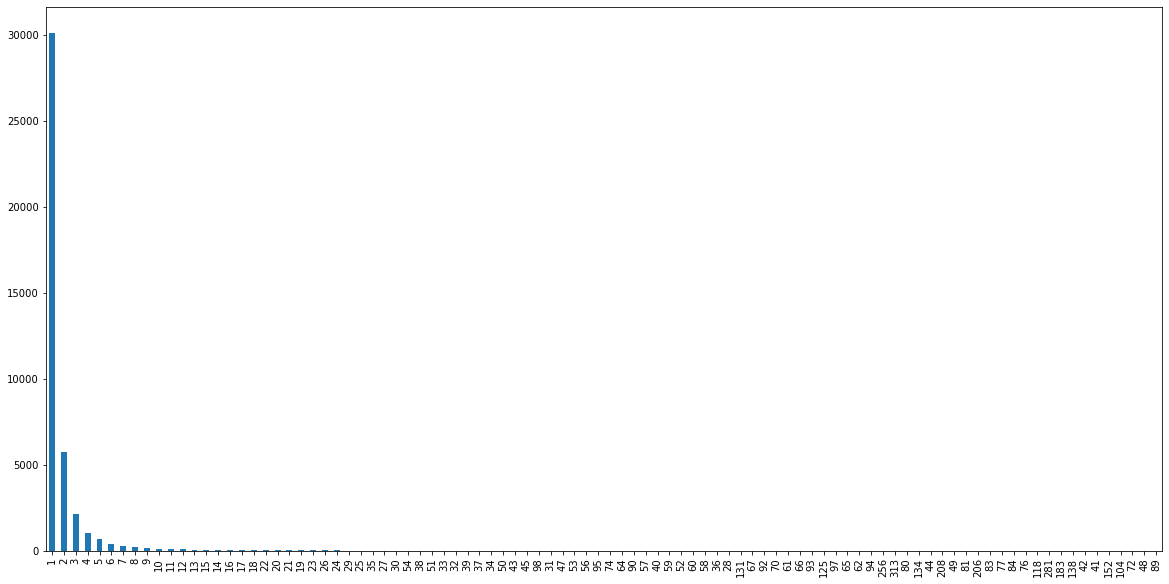

In [13]:
plt.figure(figsize =(20,10))
books_ratings['No. of Ratings'].value_counts(sort=True).plot(kind='bar')
plt.show()

#### As can be observed above, most of the books have been rated by only 1 user followed by 2 users. This cannot be used as a metric to conclude whether a book is worth reading.

#### Hence we filter the books to those that has been rated by 3 users or above:

In [14]:
books_ratings1=books_ratings[books_ratings['No. of Ratings']>2]
books_ratings1.shape

(5585, 7)

In [15]:
top_books = books_ratings1.sort_values(by=['No. of Ratings','Avg Ratings'], ascending=False)
top_books.head()

,ISBN,No. of Ratings,Avg Ratings,Book-Title,Book-Author,Year-Of-Publication,Publisher
5353,059035342X,313,8.939297,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
4035,044023722X,281,7.338078,A Painted House,John Grisham,2001,Dell Publishing Company
6352,067976402X,256,7.808594,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
3955,044021145X,208,7.822115,The Firm,John Grisham,1992,Bantam Dell Publishing Group
3872,043935806X,206,9.033981,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic


In [16]:
top_books[['ISBN','Book-Title','No. of Ratings','Avg Ratings']].head()

,ISBN,Book-Title,No. of Ratings,Avg Ratings
5353,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.939297
4035,044023722X,A Painted House,281,7.338078
6352,067976402X,Snow Falling on Cedars,256,7.808594
3955,044021145X,The Firm,208,7.822115
3872,043935806X,Harry Potter and the Order of the Phoenix (Boo...,206,9.033981


### Based on the above analysis, the top 5 popular books are:

##### 1. Harry Potter and the Sorcerer's Stone
##### 2. A Painted House
##### 3. Snow Falling on Cedars
##### 4. The Firm
##### 5. Harry Potter and the Order of the Phoenix

### Above was a simple analysis and recommendation. 
### Now let's use the effective collobartive filtering recommendation methos using kNN.

In [17]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [18]:
ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [19]:
ratings['Book-Rating'].value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [20]:
ratings_grouped

,No. of Ratings,Avg Ratings
ISBN,,
0330299891,1,6.0
0375404120,1,3.0
9022906116,1,7.0
#6612432,1,5.0
'9607092910',1,10.0
...,...,...
"\8888809228\""""",1,5.0
"\9170010242\""""",1,10.0
ooo7156103,1,7.0


In [21]:
# Merging two tables namely books and ratings:

BR_merge = pd.merge(books, ratings, on ='ISBN')
BR_merge

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5
1,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5
2,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,61501,7
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,148514,10
4,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,263256,10
...,...,...,...,...,...,...,...
80799,3453065123,Ich war Hitlerjunge Salomon. ( erlebt und erfa...,Sally Perel,1993,Heyne,274220,9
80800,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,1994,Vandenhoeck &amp; Ruprecht,274220,8
80801,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B.",274220,6
80802,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,1989,Pelikan,274220,8


In [22]:
# Merging the above table with the total and average ratings of each book:

combined  = pd.merge(BR_merge, ratings_grouped,  on ='ISBN')
combined 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,No. of Ratings,Avg Ratings
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,1,5.0
1,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,1,5.0
2,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,61501,7,3,9.0
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,148514,10,3,9.0
4,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,263256,10,3,9.0
...,...,...,...,...,...,...,...,...,...
80799,3453065123,Ich war Hitlerjunge Salomon. ( erlebt und erfa...,Sally Perel,1993,Heyne,274220,9,1,9.0
80800,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,1994,Vandenhoeck &amp; Ruprecht,274220,8,1,8.0
80801,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B.",274220,6,1,6.0
80802,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,1989,Pelikan,274220,8,1,8.0


In [23]:
# Dropping the unncessary columns:

combined1  = combined.drop(['Year-Of-Publication','Publisher'], axis=1)
combined1

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,No. of Ratings,Avg Ratings
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,8,5,1,5.0
1,1552041778,Jane Doe,R. J. Kaiser,8,5,1,5.0
2,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,61501,7,3,9.0
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,148514,10,3,9.0
4,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,263256,10,3,9.0
...,...,...,...,...,...,...,...
80799,3453065123,Ich war Hitlerjunge Salomon. ( erlebt und erfa...,Sally Perel,274220,9,1,9.0
80800,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,274220,8,1,8.0
80801,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,274220,6,1,6.0
80802,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,274220,8,1,8.0


In [24]:
list(combined1.columns.values)

['ISBN',
 'Book-Title',
 'Book-Author',
 'User-ID',
 'Book-Rating',
 'No. of Ratings',
 'Avg Ratings']

In [25]:
# Checking random row
combined1[(combined1['User-ID']==277427)&(combined1['ISBN']=='002542730X')]

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,No. of Ratings,Avg Ratings
7733,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,277427,10,77,7.805195


## Apply k-nearest neighbours

#### Removing duplicates of a user that has rated the same book multiple times

In [26]:
combined1 = combined1.drop_duplicates(['User-ID', 'Book-Title'])
combined1

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,No. of Ratings,Avg Ratings
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,8,5,1,5.0
1,1552041778,Jane Doe,R. J. Kaiser,8,5,1,5.0
2,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,61501,7,3,9.0
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,148514,10,3,9.0
4,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,263256,10,3,9.0
...,...,...,...,...,...,...,...
80799,3453065123,Ich war Hitlerjunge Salomon. ( erlebt und erfa...,Sally Perel,274220,9,1,9.0
80800,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,274220,8,1,8.0
80801,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,274220,6,1,6.0
80802,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,274220,8,1,8.0


In [27]:
# Selecting books that have been rated by 3 users or above:

books_highratings = combined1[combined1['No. of Ratings']>2]

#### We are creating a pivot table with all the books and all the users by filling the missing values with zeros. We wil be calculating the distances between the rating vectors.

In [28]:
bo_ra_pivot = books_highratings.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
bo_ra_pivot

User-ID,69,75,83,92,183,228,242,243,244,254,...,278668,278694,278720,278732,278777,278778,278832,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$oft Money: The True Power in Our Nation's Capital,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09-Nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
together by christmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
why I'm like this : True Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Â¿QuÃ© me quieres, amor?",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Transforming the pivot table into a sparse matrix:

In [29]:
from scipy.sparse import csr_matrix
bo_ra_pivot_matrix = csr_matrix(bo_ra_pivot.values)
bo_ra_pivot_matrix

<5436x17692 sparse matrix of type '<class 'numpy.float64'>'
	with 39154 stored elements in Compressed Sparse Row format>

### The most important part:
#### We are using the unsupervised machine learning method of k-nearest neighbours by finding the cosine similarity between the rating vectors.
#### We have used p=2 to calculate using euclidean distance instead of manhattan distance (p=1).

In [30]:
# kNN:

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', leaf_size=30, n_neighbors=7, p =2)


# Fitting the model:
model_knn.fit(bo_ra_pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

#### Book Recommendation model has been successfully created. 
#### Now let's verify this by assigning the input variables.

In [31]:
bo_ra_pivot.head(3)

User-ID,69,75,83,92,183,228,242,243,244,254,...,278668,278694,278720,278732,278777,278778,278832,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$oft Money: The True Power in Our Nation's Capital,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
bo_ra_pivot.shape[0]

5436

#### Randomly assigning an index from our data:

In [33]:
book_index = np.random.choice(bo_ra_pivot.shape[0])
print('Index is:', book_index, '\nBook is:', bo_ra_pivot.index[book_index])

Index is: 940 
Book is: Dark Heart (Dragonlance: The Meetings Sextet, Vol. 3)


#### Calculating the indices for the most closely related books and its distances (the lesser the better).

In [34]:
distances, indices = model_knn.kneighbors(bo_ra_pivot.iloc[book_index,:].values.reshape(1, -1), n_neighbors = 6)
print('Distances:',distances)
print('Indices:',indices)

Distances: [[0.         0.11026976 0.29701319 0.45797382 0.47145554 0.47783177]]
Indices: [[ 940 4204 5196  945 5205 4593]]


In [35]:
print(len(distances))

# we are flattening to access the array
print (len(distances.flatten()))

1
6


### Finding the top 5 books that are closely related to our selected book:

In [36]:
print ('Recommended books for "', bo_ra_pivot.index[book_index], '" are:\n')

for i in range(1, len(indices.flatten())):
    print (i,'. "', bo_ra_pivot.index[indices.flatten()[i]], '" with a distance of:',  round((distances.flatten()[i]),3)) 

Recommended books for " Dark Heart (Dragonlance: The Meetings Sextet, Vol. 3) " are:

1 . " The Black Wing (Dragonlance:  Villains, Book 2) " with a distance of: 0.11
2 . " Wanderlust (Dragonlance: The Meetings Sextet, Vol. 2) " with a distance of: 0.297
3 . " Darkness and Light (Dragonlance: Preludes) " with a distance of: 0.458
4 . " War of the Twins (DragonLance Legends, Vol 2) " with a distance of: 0.471
5 . " The Midnight Cafe (Anita Blake, Vampire Hunter) " with a distance of: 0.478


### Thus, we have successfully built our Book Recommendation Engine with Collaborative Filtering method Using k-Nearest Neighbors (kNN).

## Thank You!